__Content:__
- 4.3.1 JointGrid & Jointplot
- 4.3.2 PairGrid and Pairplot
- 4.3.3 FacetGrid
- 4.3.4 Lmplot
- 4.3.5 Factorplot
- 4.3.6 Exercises

__Import Libraries:__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
tips = sns.load_dataset("tips")

## 4.3.1 JointGrid & Jointplot

JointGrid is used to plot bivariate data and their marginal univariate plot.

Jointplot is an eaiser version of JointGrid, with a few options available for bivariate plots:
 - scatter (default, also shows the correlation r)
 - reg (fit linear regression line)
 - resid
 - kde
 - hex


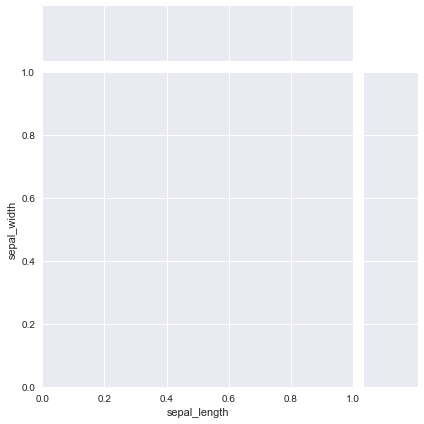

In [22]:
# Show the joint grid only
sns.JointGrid('sepal_length','sepal_width',data=iris);

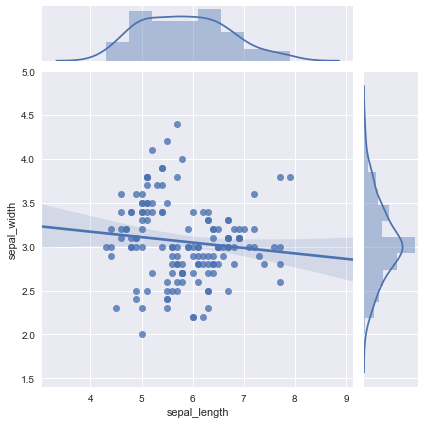

In [23]:
# Using JointGrid
g = sns.JointGrid('sepal_length','sepal_width',data=iris)
g.plot(sns.regplot,sns.distplot);

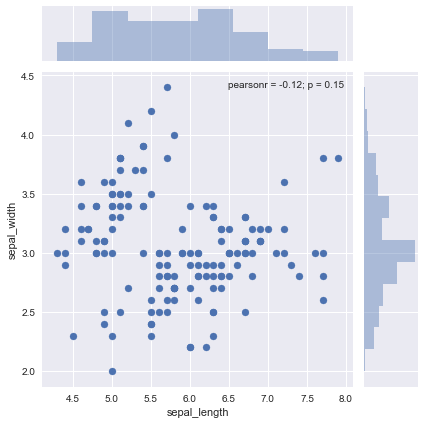

In [12]:
# Using jointplot, default choice is scatter plot
sns.jointplot('sepal_length','sepal_width',data=iris);

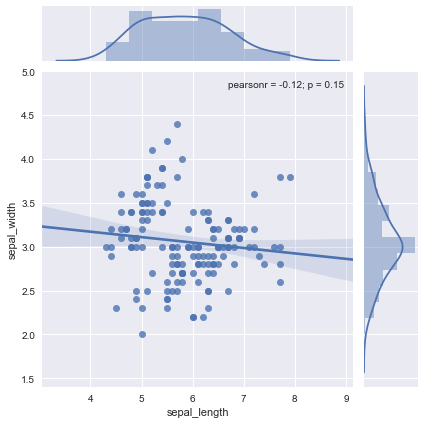

In [25]:
# Fit a regression line on the scatter plot
sns.jointplot('sepal_length','sepal_width',data=iris, kind='reg');

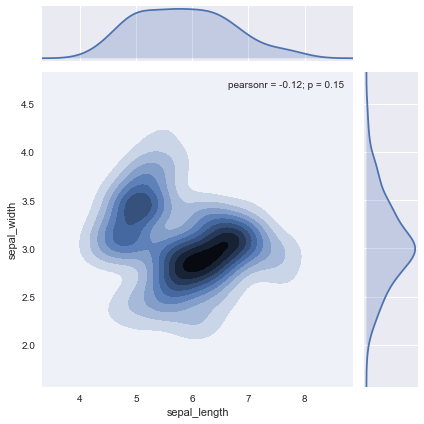

In [7]:
# Display kde plot
sns.jointplot('sepal_length','sepal_width',data=iris, kind='kde');

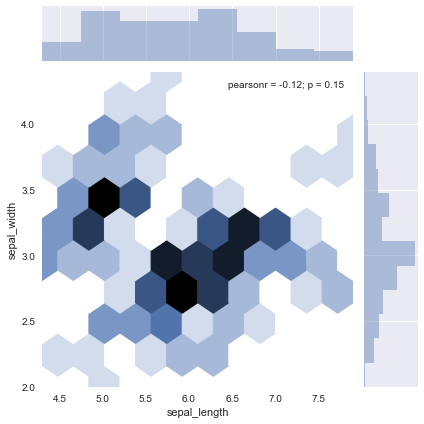

In [8]:
# Use hex plot
sns.jointplot('sepal_length','sepal_width',data=iris, kind='hex');

## 4.3.2 PairGrid & Pairplot

PairGrid is used to visualise pairwise relationships among multiple quantitative variables in a data set.

Dataframe must be in 'long-form' where each row is an observation and each column is a variable.

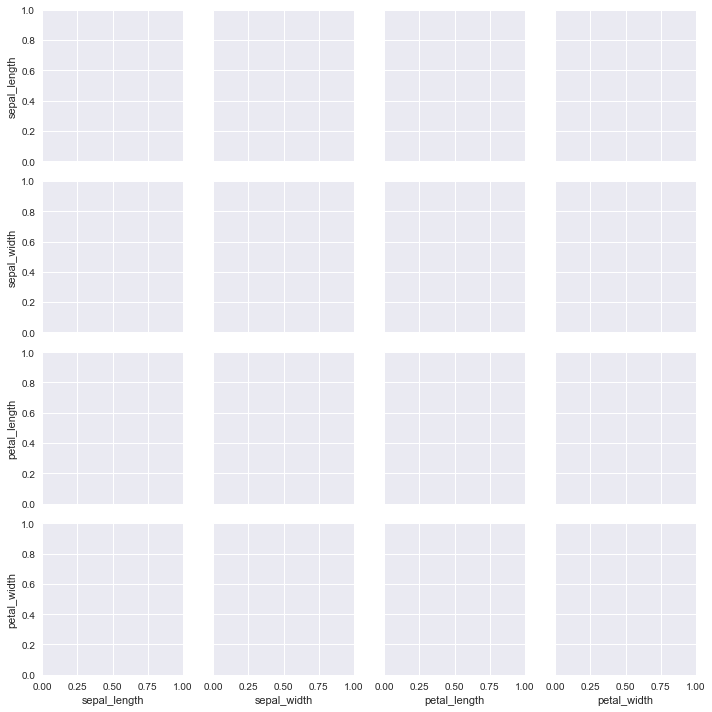

In [9]:
# Plot the grid only
sns.PairGrid(iris);

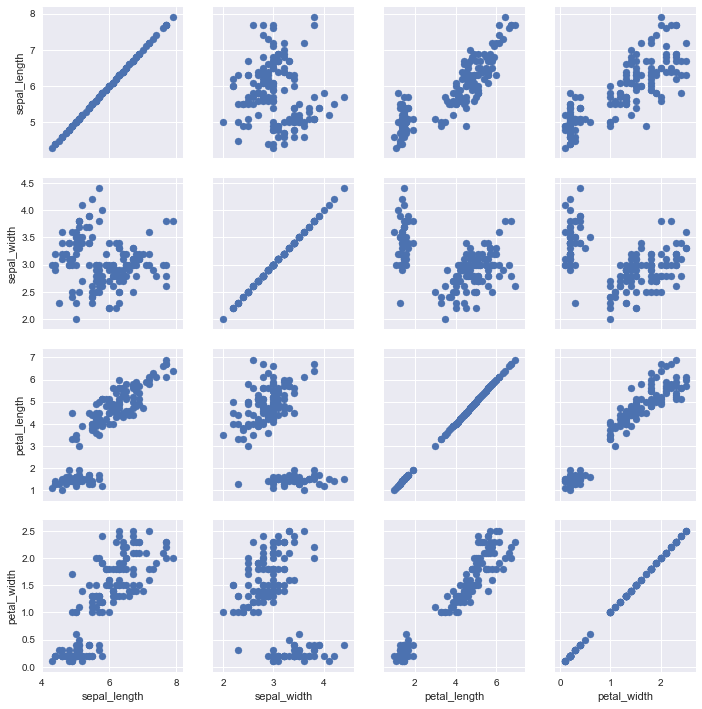

In [19]:
# Map the grid to any plots (scatter, hist, kde, etc)
g = sns.PairGrid(iris)
g.map(plt.scatter);

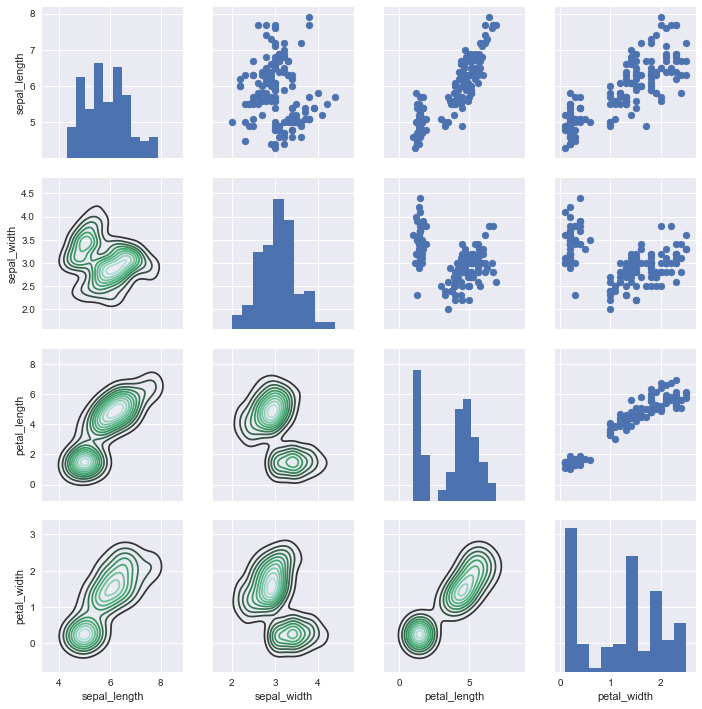

In [15]:
# Map diag, upper and lower grids to different plots
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

Pairplot is a simpler version of PairGrid, without using .map.

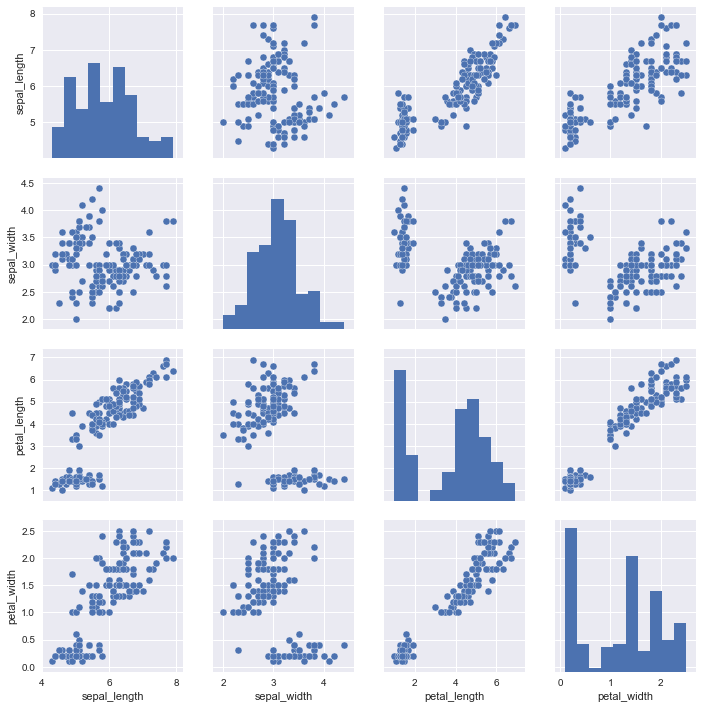

In [20]:
# An easier option using pairplot, default diag = hist, off_diag = scatter
sns.pairplot(iris);

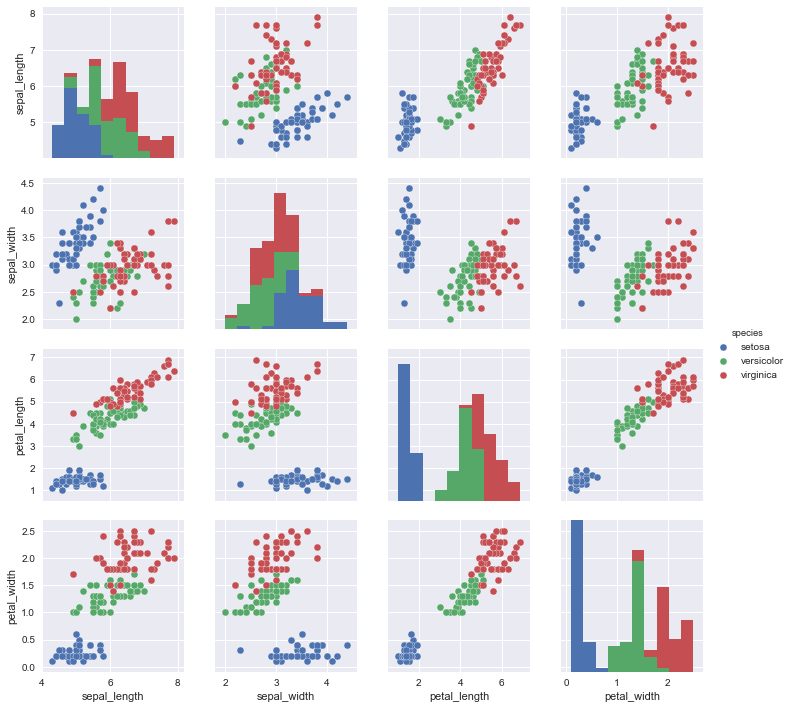

In [8]:
# Use hue parameter 
sns.pairplot(data=iris, hue='species');

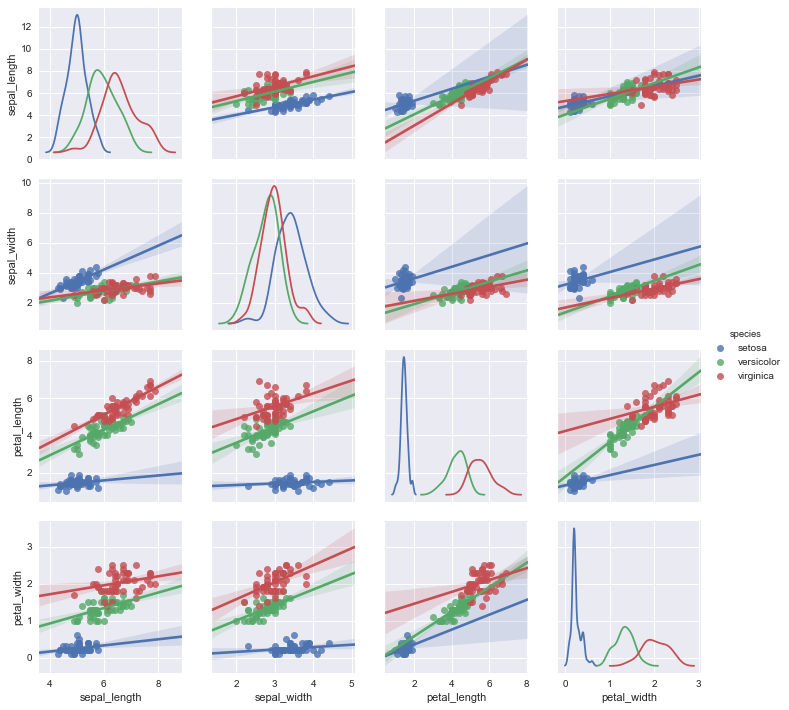

In [13]:
# Customising diag and fitting regression line
sns.pairplot(iris, hue='species',kind='reg',diag_kind='kde');

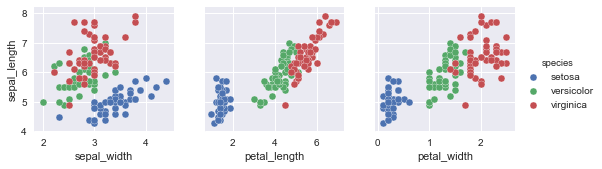

In [9]:
# Show only a subset of all possible pairs
sns.pairplot(data=iris,y_vars=['sepal_length'],x_vars=['sepal_width','petal_length','petal_width'],hue='species');

## 4.3.3 FacetGrid

FacetGrid is used to draw plots on multiple axes (m rows, n columns) where each plot shows the relationship conditioned on different levels of multiple categorical variables.

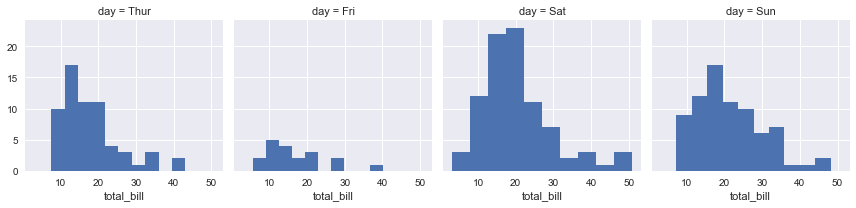

In [27]:
# Visualising one numerical variable and conditioned on 1 categorical variable
g = sns.FacetGrid(tips,col='day')
g.map(plt.hist,'total_bill');

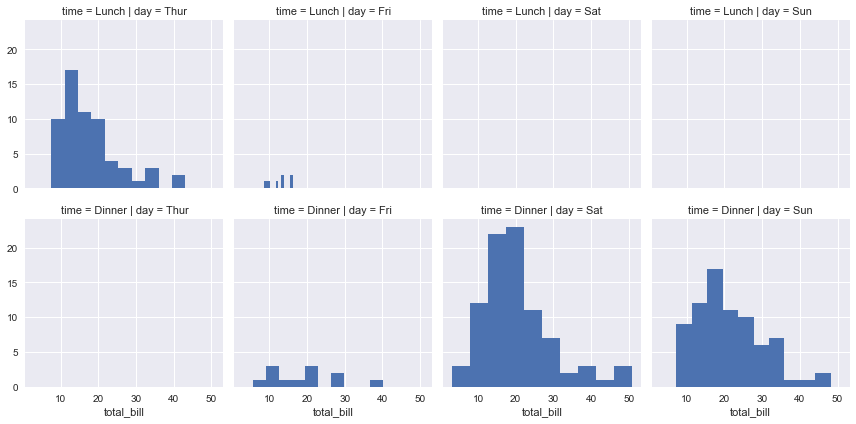

In [28]:
# Visualising one numerical variable and conditioned on 2 categorical variables
g = sns.FacetGrid(tips, col="day",  row="time")
g = g.map(plt.hist, "total_bill");

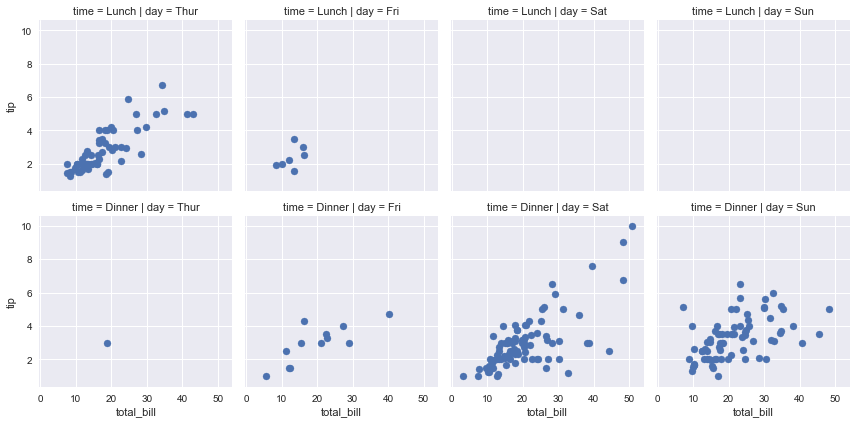

In [29]:
# Visualising two numerical variables and conditioned on 2 categorical variables
g = sns.FacetGrid(tips, col="day",  row="time")
g.map(plt.scatter, "total_bill", "tip");

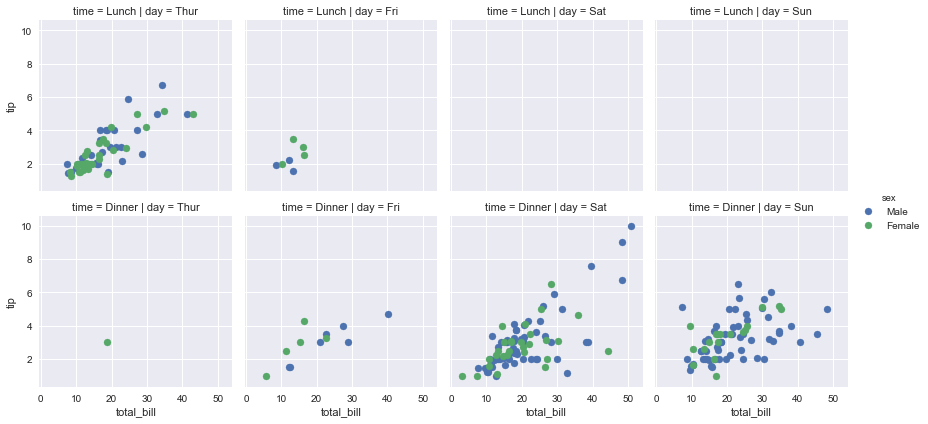

In [30]:
# Visualising 2 numerical variables and conditioned on 3 categorical variables
g = sns.FacetGrid(tips, col="day",  row="time", hue='sex')
g.map(plt.scatter, "total_bill", "tip")
g.add_legend();

## 4.3.4 Lmplot

Lmplot integrates Regplot with FacetGrid, allowing multiple subplots of linear regression across different variables.

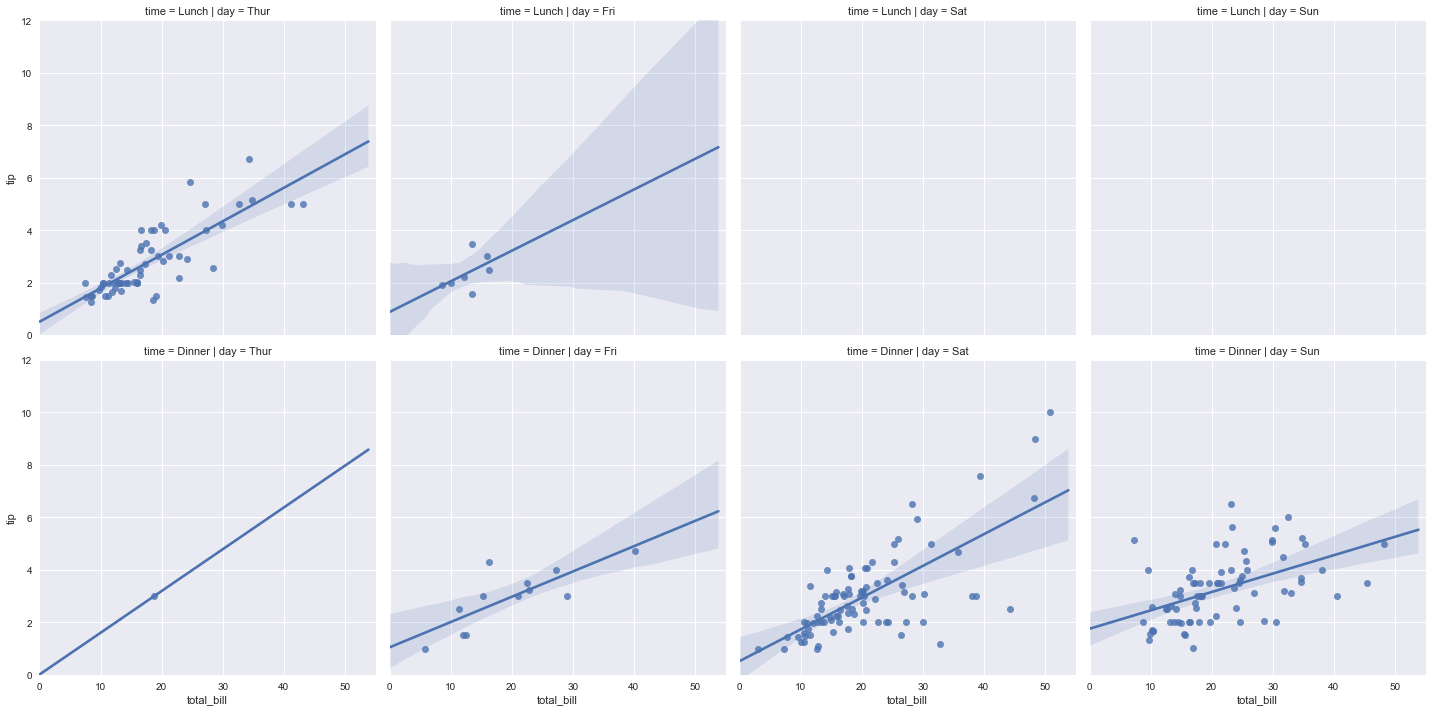

In [16]:
g = sns.lmplot(x="total_bill", y="tip", row="time", col="day", data=tips)
g.set(xlim=(0, 55), ylim=(0, 12));

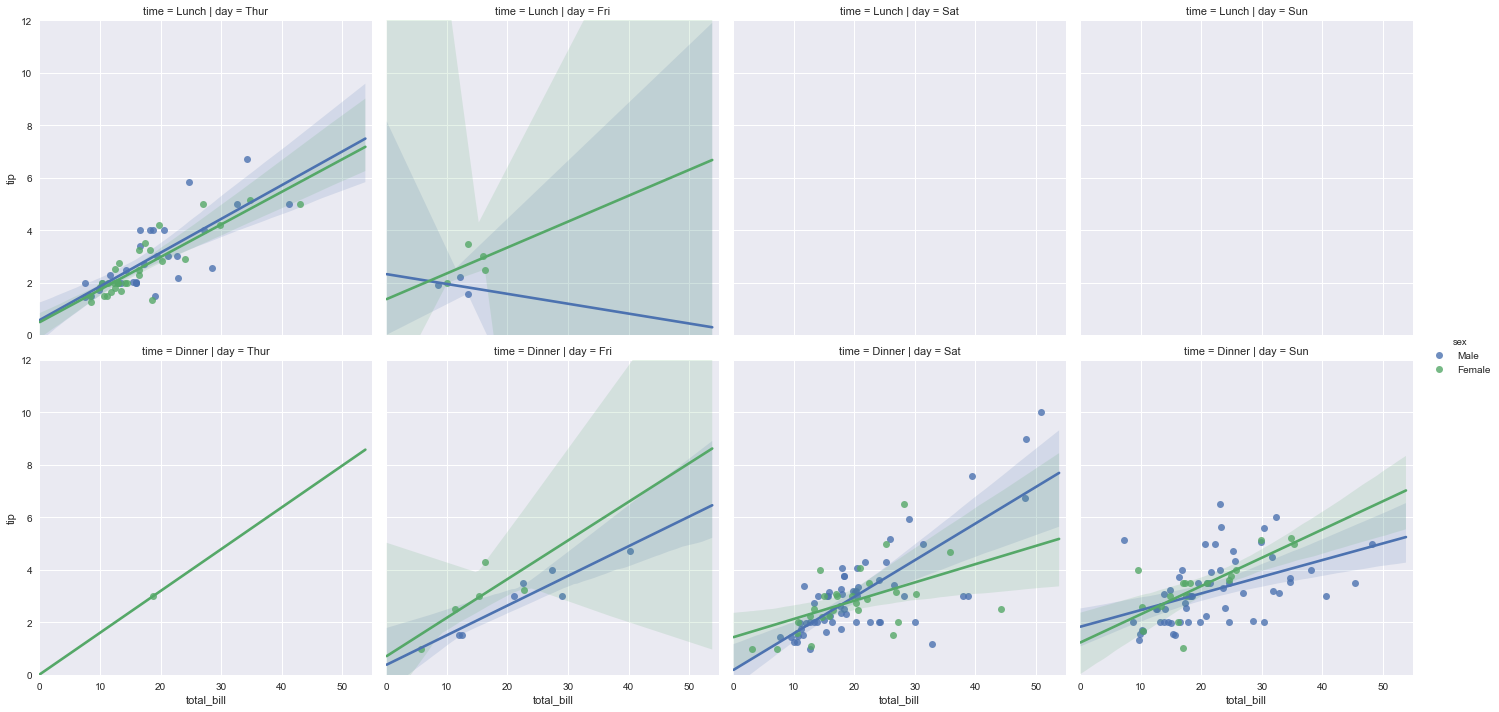

In [17]:
g = sns.lmplot(x="total_bill", y="tip", row="time", col="day", hue='sex', data=tips)
g.set(xlim=(0, 55), ylim=(0, 12));

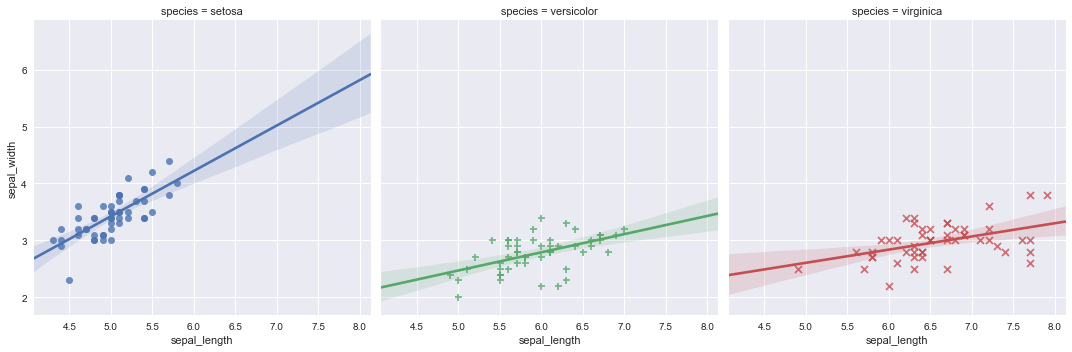

In [14]:
# Lmplot also allows the use of hue parameter, which is not available in regplot
sns.lmplot('sepal_length','sepal_width',data=iris,col='species',hue='species',markers=['o','+','x']);

## 4.3.5 Factorplot

Factorplot combines categorical plots with FacetGrid. Choices of categorical plots include: point (default), bar, count, box, violin and strip.

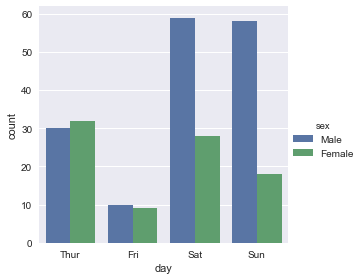

In [23]:
sns.factorplot(x='day', hue='sex', data=tips, kind='count');

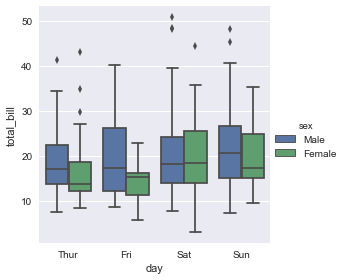

In [8]:
sns.factorplot(x='day', y='total_bill', hue='sex', data=tips, kind='box');

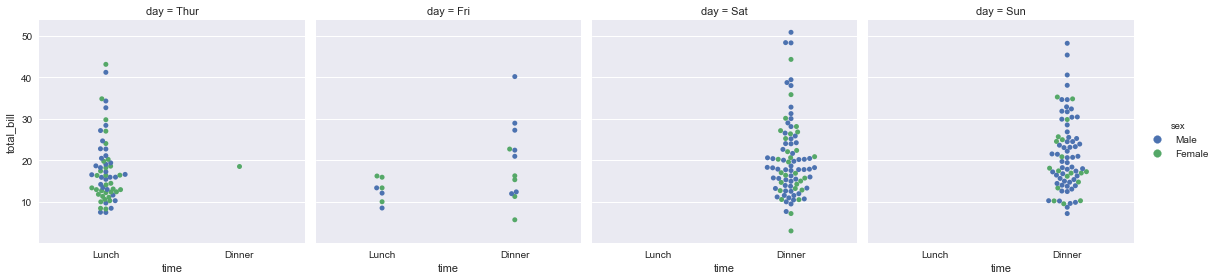

In [42]:
sns.factorplot(x='time', y='total_bill',col='day', hue='sex',data=tips, kind='swarm');

## 4.3.6 Exercises

In [25]:
# Import the clearned excel marksheet
df = pd.read_excel('Marks_clean.xlsx')
df.head()

,Student_Id,Subject_Class,Student_Class,ICA,MST,Exam,Total,Course,Year,School
0,p1,Class01,DARE/FT/1A/01,81,65,74,73.50,DARE,1,MAE
1,p2,Class01,DARE/FT/1A/01,75,79,94,85.50,DARE,1,MAE
2,p3,Class01,DARE/FT/1A/01,85,92,73,80.75,DARE,1,MAE
3,p4,Class01,DARE/FT/1A/01,87,66,73,74.75,DARE,1,MAE
4,p5,Class01,DARE/FT/1A/01,82,52,90,78.50,DARE,1,MAE


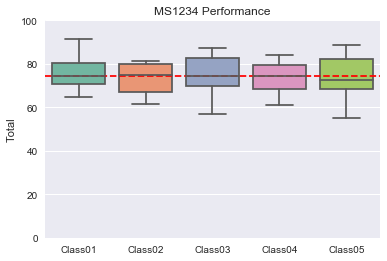

In [27]:
# Visualise the marks distribution by Subject Class
sns.boxplot(data=df, x='Subject_Class', y='Total',palette='Set2')
plt.ylim(0,100)
plt.axhline(df['Total'].mean(),color='r',ls='--')
plt.title('MS1234 Performance')
plt.xlabel('');

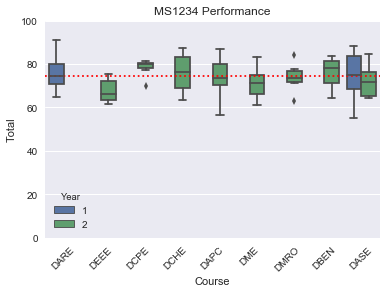

In [47]:
# Visualise the distribution by Course
ax = sns.boxplot(data=df,x='Course',y='Total')
ax.set_title('MS1234 Performance')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.axhline(df['Total'].mean(),color='r',linestyle=':')
plt.ylim(0,100);

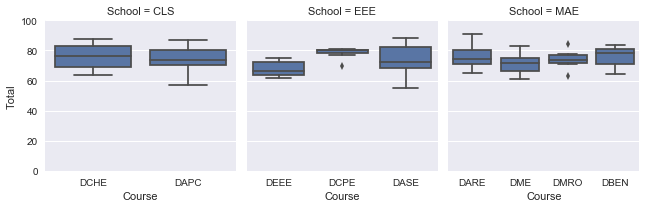

In [50]:
# Visualise the marks distribution by School and Course using Facet Grid
g = sns.FacetGrid(data=df, col='School', sharex=False)
g.map(sns.boxplot,'Course','Total')
plt.ylim((0,100));

In [43]:
#sns.factorplot(x='Course', y='Total', col='School', data=df, kind='box', sharex=False);

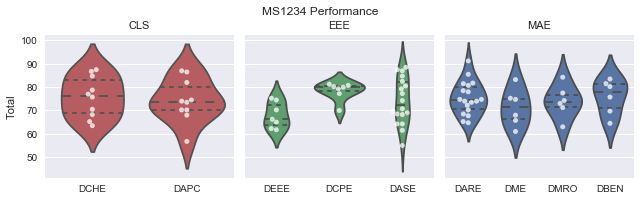

In [51]:
# Further Customisation 
g = sns.FacetGrid(data=df, col='School', hue='School',sharex=False,col_order=['CLS','EEE','MAE'])
g.map(sns.violinplot,'Course','Total',inner='quartile')
g.map(sns.swarmplot,'Course','Total',color='w',alpha=0.75)
# Remove x_labels 'Course'
g.set_xlabels('') 
# Set each column title as its column name
g.set_titles('{col_name}')
# Set an overall title to the figure
g.fig.subplots_adjust(top=0.85) 
g.fig.suptitle('MS1234 Performance',fontsize=12);
# Save the figure (default as .png)
plt.savefig('MS1234 Performance.jpeg',dpi=300)

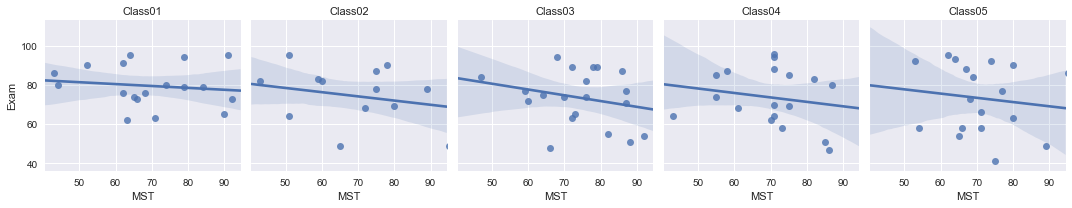

In [45]:
g = sns.FacetGrid(data=df,col='Subject_Class')
g.map(sns.regplot,'MST','Exam')
g.set_titles('{col_name}');

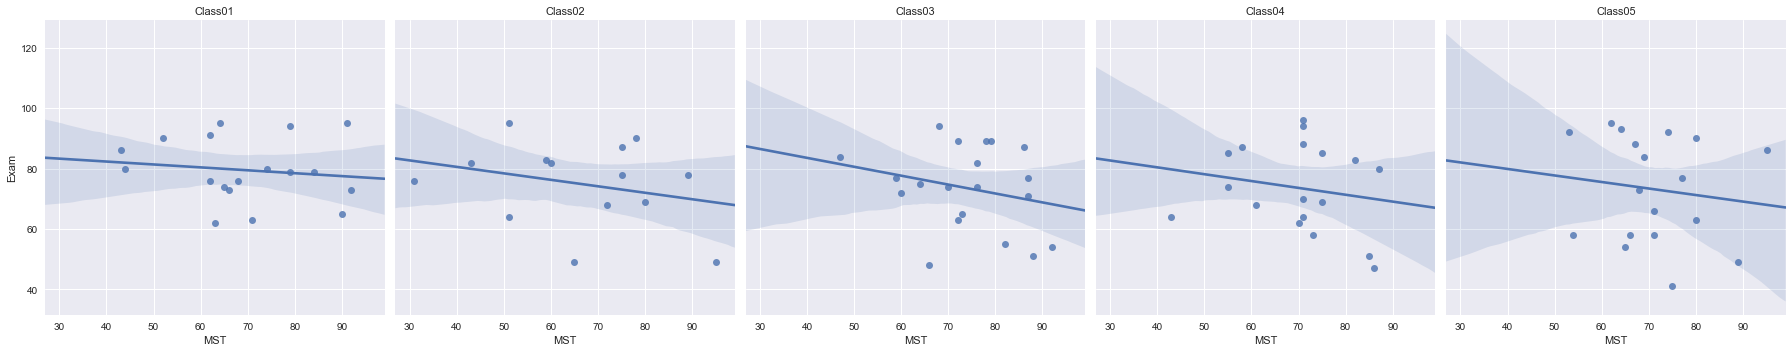

In [49]:
g = sns.lmplot(data=df,x='MST',y='Exam',col='Subject_Class');
g.set_titles('{col_name}');

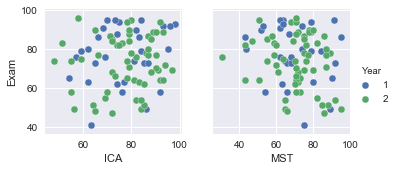

In [17]:
sns.pairplot(data=df,y_vars='Exam',x_vars=['ICA','MST'],hue='Year');

In [46]:
#dflong = pd.melt(df,id_vars=['Student_Id','Subject_Class','Course','School','Year'],
#                 value_vars=['ICA','MST','Exam','Total'],value_name='Marks',var_name='Component')
#dflong.head()

In [37]:
#def add_mean_line(x, **kwargs):
#    plt.axhline(x.mean(), **kwargs)
#g.map(add_mean_line,'Marks',color='r')
#g.map(add_mean_line,'Marks')
#plt.axhline(df['Marks'].mean())
#g.map_dataframe(plt.axhline,df['Marks'].mean())

In [35]:
#axx = g.axes.ravel().tolist()

#axx[0]